# PRICE PREDICTOR


importing


In [103]:
from pickle import TRUE
from pkgutil import ImpImporter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing import alphanums
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from joblib import dump,load
np.random.seed(42)

 Initialising 


In [104]:

house=pd.read_csv("dat.csv")


 Just analysing data

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD   TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900     1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671     2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671     2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622     3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622     3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    

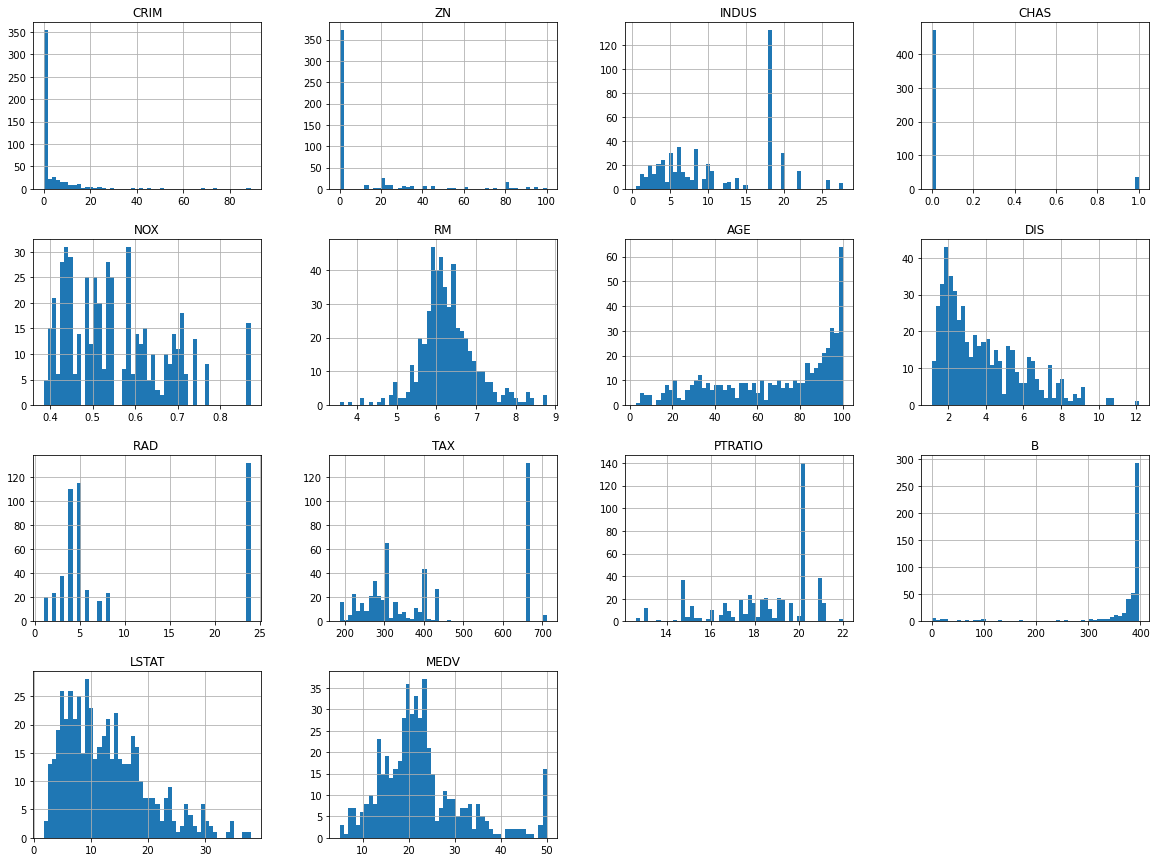

In [105]:

print(house.head())
print(house.info())
print(house['CHAS'].value_counts())
print(house.describe())
house.hist(bins=50, figsize=(20,15))
plt.show()



Test-Train splitting manually


In [106]:

# shuff=np.random.permutation(len(house))
# print(shuff)
# set_size=int(len(house)*0.2)
# test_ind=shuff[:set_size]
# train_ind=shuff[set_size:]
# train_set=house.iloc[train_ind]
# test_set=house.iloc[test_ind]
# print(len(test_set),len(train_set))



Test-Train Splitting from sklearn


In [107]:

train_set, test_set=train_test_split(house,test_size=0.2, random_state=42)
print(len(test_set),len(train_set))


102 404



 Stratified_Splitting


In [108]:

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(house, house['CHAS']):
    strat_train_set=house.loc[train_index]
    strat_test_set=house.loc[test_index]
house=strat_train_set.copy()


 Finding Correlations


MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64


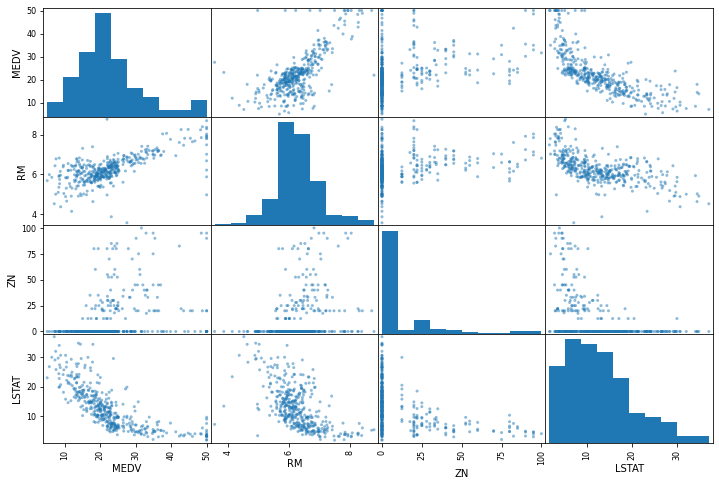

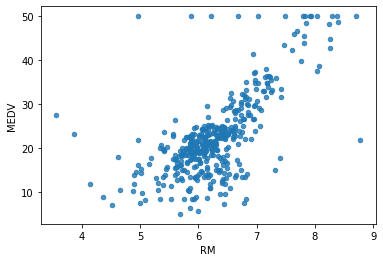

In [109]:

corr_matrix=house.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(house[attributes],figsize=(12,8))
house.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)
plt.show()



 Attributes Combine


In [110]:

# house['TPM']=house['TAX']/house['RM']
# house['TPM']=house['TAX']/house['RM']
# corr_matrix=house.corr()
# print(corr_matrix['MEDV'].sort_values(ascending=False))
# house.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)
# plt.show()



 Spltting data and label


In [111]:

house=strat_train_set.drop("MEDV",axis=1)
house_label=strat_train_set['MEDV'].copy()

 Missing Attributes Handling Manually


In [112]:

# house.dropna(subset=['RM'],inplace=TRUE) #missing data points gone
# house.drop('RM',axis=1,inplace=TRUE) #RM attribute removed
# median=house['RM'].median()
# house['RM'].fillna(median,inplace=TRUE) #set value with median

Missing Attributes Handling From Sklearn


In [113]:

# imputer=SimpleImputer(strategy='median')
# imputer.fit(house)
# print(imputer.statistics_)
# D=imputer.transform(house)
# house_tr=pd.DataFrame(D,columns=house.columns)



 Pipelining


In [114]:

pipl=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])
house_tr_num=pipl.fit_transform(house)



 Linear Regression


In [115]:

model=LinearRegression()
model.fit(house_tr_num,house_label)


LinearRegression()


Some Testing


In [116]:

some_data=house.iloc[:5]
some_label=house_label.iloc[:5]
fin_data=pipl.transform(some_data)
print(model.predict(fin_data))
print(list(some_label))


[23.94996893 27.21690623 20.58079789 25.04088721 23.76177838]
[21.9, 24.5, 16.7, 23.1, 23.0]



Evaluation


In [117]:

house_pred=model.predict(house_tr_num)
mse=mean_squared_error(house_label,house_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)


23.32234607923367
4.829321492635759



Cross Validation


In [118]:

scores=cross_val_score(model,house_tr_num,house_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)

[4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]



Decision Tree Regressor


In [119]:

model=DecisionTreeRegressor()
model.fit(house_tr_num,house_label)


DecisionTreeRegressor()


Some Testing


In [120]:

some_data=house.iloc[:5]
some_label=house_label.iloc[:5]
fin_data=pipl.transform(some_data)
print(model.predict(fin_data))
print(list(some_label))


[21.9 24.5 16.7 23.1 23. ]
[21.9, 24.5, 16.7, 23.1, 23.0]



 Evaluation


In [121]:

house_pred=model.predict(house_tr_num)
mse=mean_squared_error(house_label,house_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)


0.0
0.0



Cross Validation


In [122]:

scores=cross_val_score(model,house_tr_num,house_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)


[4.1543982  5.5815244  5.55331147 3.8604625  3.8741128  2.95427656
 6.75851315 3.93913061 3.48489598 4.5754508 ]



Random Forest Regressor


In [123]:

model=RandomForestRegressor()
model.fit(house_tr_num,house_label)


RandomForestRegressor()


Some Testing


In [124]:

some_data=house.iloc[:5]
some_label=house_label.iloc[:5]
fin_data=pipl.transform(some_data)
print(model.predict(fin_data))
print(list(some_label))


[22.561 25.256 16.577 23.511 23.483]
[21.9, 24.5, 16.7, 23.1, 23.0]



 Evaluation


In [125]:

house_pred=model.predict(house_tr_num)
mse=mean_squared_error(house_label,house_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)


1.7658800643564332
1.3288642008709668



 Cross Validation


In [126]:

scores=cross_val_score(model,house_tr_num,house_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)


[2.73249129 2.95780827 4.42789523 2.70001354 3.33299751 2.66834821
 4.91159723 3.31126588 2.8947836  3.35800884]



Finalising


In [127]:

dump(model,'Realestate.joblib')

['Realestate.joblib']